<a href="https://colab.research.google.com/github/S-Rachana/SRachana/blob/main/Assignment_2_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv('SMS_spam.csv', encoding='latin-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN


In [ ]:
#removing unnamed columns
dataset = dataset.drop('Unnamed: 2', 1)
dataset = dataset.drop('Unnamed: 3', 1)

In [ ]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
dataset = dataset.rename(columns = {'v1':'label','v2':'message'})

In [ ]:
dataset.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham        82     82  Go until jurong point, crazy.. Available only ...    1
spam       17     17  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [ ]:
dataset.head(4)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


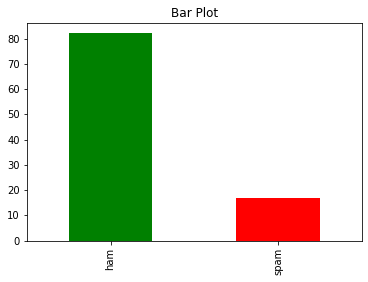

In [ ]:
count_Class=pd.value_counts(dataset["label"], sort= True)
count_Class.plot(kind = 'bar',color = ["green","red"])
plt.title('Bar Plot')
plt.show();

In [ ]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(dataset["message"])
np.shape(X)

(99, 595)

In [ ]:
#Implementing Naive Bayes
dataset["label"]=dataset["label"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, dataset['label'], test_size=0.70, random_state=42)

In [ ]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [ ]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,1.0,0.757143,0.800000,0.461538
1,0.11001,1.0,0.742857,1.000000,0.454545
2,0.22001,1.0,0.842857,1.000000,0.576923
3,0.33001,1.0,0.857143,0.866667,0.619048
4,0.44001,1.0,0.885714,0.800000,0.705882
5,0.55001,1.0,0.885714,0.733333,0.733333
6,0.66001,1.0,0.900000,0.733333,0.785714
7,0.77001,1.0,0.885714,0.666667,0.769231
8,0.88001,1.0,0.885714,0.666667,0.769231
9,0.99001,1.0,0.900000,0.600000,0.900000


In [ ]:
y_pred=bayes.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index,:]

alpha             1.100010
Train Accuracy    1.000000
Test Accuracy     0.900000
Test Recall       0.533333
Test Precision    1.000000
Name: 10, dtype: float64

In [ ]:
#Confusion Matrix for Naive Bayes Classifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix obtained: ")
print(cm)

Confusion Matrix obtained: 
[[55  0]
 [15  0]]


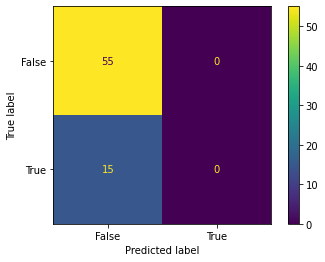

In [ ]:
#Displaying the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[False,True])
cm_display.plot()
plt.show()

In [ ]:
#ROC curve for Naive Bayes Classifier
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve For Naive Bayers:",roc_auc)

Area under the curve For Naive Bayers: 0.5


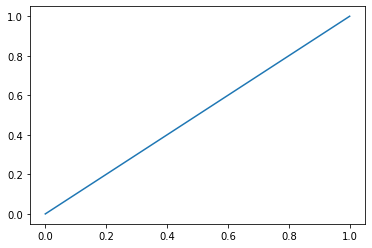

In [ ]:
#Displaying the ROC curve 
plt.plot(false_positive_rate,true_positive_rate)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        55
           1       0.00      0.00      0.00        15

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

